In [1]:
import grafiti as gf
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import squidpy as sq
from sklearn import metrics
import seaborn as sns
import pandas as pd
import anndata as ad
import torch

import warnings
warnings.filterwarnings('ignore')

datadir = "/data1/shahs3/users/mezallj1/data/xenium"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
def plot_region(adata, region):
    new_adata = adata[adata.obs['Region']==region]
    sc.pl.embedding(new_adata, basis='spatial', title = '0027465 - Grafiti - Combined', color ='grafiti_motif', s=20, add_outline=True)
    return

In [16]:
adata = sc.read_h5ad(f'{datadir}/raw/0027465/0027465_combined.h5ad')

In [17]:
sq.gr.spatial_neighbors(adata,radius=50,coord_type='generic',delaunay=True,library_key='Region') # Creates spatial_connectivities and spatial_distances in 'obsp' from spatial location (x,y) in 'obsm'

In [27]:
gae = gf.ml.GAE(adata, layers=[50,50], lr=0.01, device=device, exponent=2, distance_scale=10)

Generating PyTorch Geometric Dataset...
Setting up Model...
Ready to train!


In [28]:
gae.train(4000, update_interval=100, threshold=1e-10)

Epoch 0 ** iteration 0 ** Loss: 3.7225027084350586
Epoch 100 ** iteration 100 ** Loss: 3.715426902770996
Epoch 200 ** iteration 200 ** Loss: 3.707783124446869
Epoch 300 ** iteration 300 ** Loss: 3.7031499123573304
Epoch 400 ** iteration 400 ** Loss: 3.699233818054199
Epoch 500 ** iteration 500 ** Loss: 3.6953863310813904
Epoch 600 ** iteration 600 ** Loss: 3.6913868188858032
Epoch 700 ** iteration 700 ** Loss: 3.6871697735786437
Epoch 800 ** iteration 800 ** Loss: 3.6826243162155152
Epoch 900 ** iteration 900 ** Loss: 3.677476305961609
Epoch 1000 ** iteration 1000 ** Loss: 3.671264419555664
Epoch 1100 ** iteration 1100 ** Loss: 3.6642766213417053
Epoch 1200 ** iteration 1200 ** Loss: 3.6562769913673403
Epoch 1300 ** iteration 1300 ** Loss: 3.647135090827942
Epoch 1400 ** iteration 1400 ** Loss: 3.636673622131348
Epoch 1500 ** iteration 1500 ** Loss: 3.6246748971939087
Epoch 1600 ** iteration 1600 ** Loss: 3.610825538635254
Epoch 1700 ** iteration 1700 ** Loss: 3.59481260061264
Epoch 18

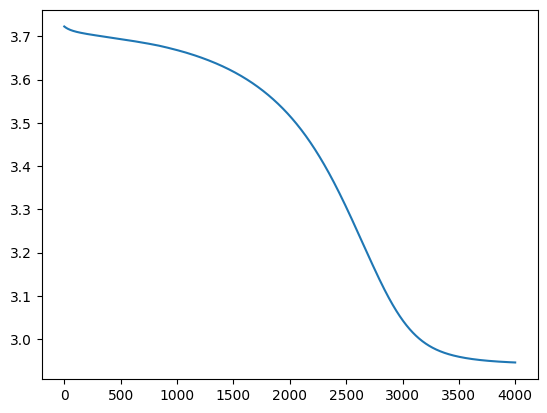

In [29]:
gae.plot()

In [30]:
gae.load_embedding(adata, encoding_key="X_grafiti") # Load features into the z latent space

In [ ]:
gf.tl.umap(adata) # Embed grafiti latent space into umap latent space (2 dimensions)

In [ ]:
gf.tl.find_motifs_gmm(adata,k=15)

In [ ]:
sc.pl.umap(adata,title="0027465 - Grafiti - Combined",color=["grafiti_motif"],s=20)

In [ ]:
sc.pl.embedding(adata, basis='spatial', title = '0027465 - Grafiti - Combined', color ='grafiti_motif', s=20, add_outline=True)

In [ ]:
plot_region(adata, 'Region1')

# Quality Control Metrics

## Region 1

In [2]:
adata = sc.read_10x_h5(f'{datadir}/raw/0027465/cell_feature_matrix_region1.h5')
df = pd.read_csv(f'{datadir}/raw/0027465/cells_region1.csv')

In [3]:
df.set_index(adata.obs_names, inplace=True)
adata.obs = df.copy()
adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()

In [4]:
adata

AnnData object with n_obs × n_vars = 71084 × 477
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'

In [5]:
sc.pp.calculate_qc_metrics(adata, percent_top=(10, 20, 50, 150), inplace=True)

In [6]:
cprobes = (
    adata.obs["control_probe_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
cwords = (
    adata.obs["control_codeword_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
print(f"Negative DNA probe count % : {cprobes}")
print(f"Negative decoding count % : {cwords}")

Negative DNA probe count % : 0.0022141754782271793
Negative decoding count % : 0.0040770242200566876


In [7]:
adata.obs

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area,n_genes_by_counts,log1p_n_genes_by_counts,log1p_total_counts,pct_counts_in_top_10_genes,pct_counts_in_top_20_genes,pct_counts_in_top_50_genes,pct_counts_in_top_150_genes
aaaafgco-1,aaaafgco-1,1120.268555,2549.067383,170,0,0,0,0,170.0,89.725472,21.268595,56,4.043051,5.141664,52.352941,71.176471,96.470588,100.0
aaacpopp-1,aaacpopp-1,865.531494,2529.324463,122,0,0,0,0,122.0,85.119534,19.417188,60,4.110874,4.812184,40.983607,57.377049,91.803279,100.0
aaaddcac-1,aaaddcac-1,863.955505,2552.404297,340,0,0,0,0,340.0,173.490319,78.887972,86,4.465908,5.831882,57.352941,70.588235,89.411765,100.0
aaadejcm-1,aaadejcm-1,871.110962,2547.441162,204,0,0,0,0,204.0,88.009534,41.814689,65,4.189655,5.323010,50.490196,69.117647,92.647059,100.0
aaadelaj-1,aaadelaj-1,872.429138,2540.570801,123,0,0,0,0,123.0,53.645627,18.920469,54,4.007333,4.820282,47.967480,69.105691,96.747967,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ojbdlinb-1,ojbdlinb-1,4146.676758,1677.089233,97,0,0,0,0,97.0,47.820470,16.256251,50,3.931826,4.584968,47.422680,68.041237,100.000000,100.0
ojbebblf-1,ojbebblf-1,4150.089844,1683.012573,210,0,0,0,0,210.0,96.634379,26.010001,76,4.343805,5.351858,44.761905,62.857143,87.619048,100.0
ojbechco-1,ojbechco-1,4153.227539,1644.020142,201,0,0,0,0,201.0,73.830471,33.460782,72,4.290459,5.308268,39.800995,60.199005,89.054726,100.0
ojbejicb-1,ojbejicb-1,4151.086914,1649.876831,88,0,0,0,0,88.0,32.964064,7.179844,49,3.912023,4.488636,47.727273,67.045455,100.000000,100.0


In [8]:
adata.obs.replace([np.inf, -np.inf], np.nan, inplace=True)

<Axes: title={'center': 'Nucleus ratio'}, ylabel='Count'>

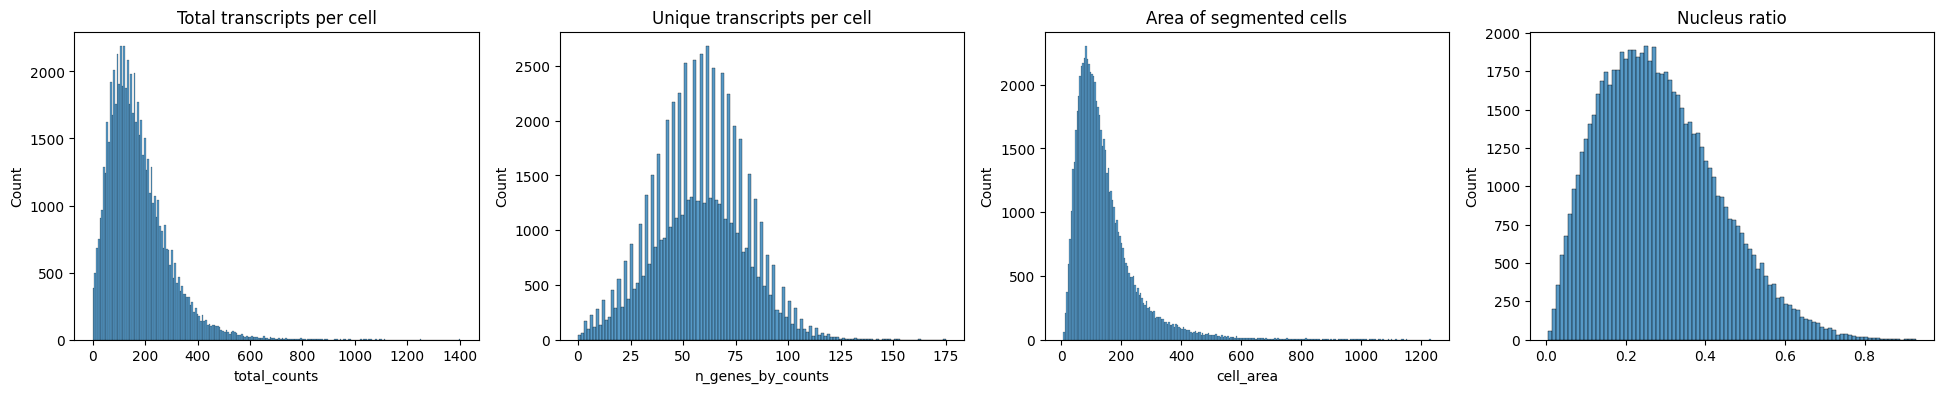

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(24, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)


axs[2].set_title("Area of segmented cells")
sns.histplot(
    adata.obs["cell_area"],
    kde=False,
    ax=axs[2],
)

axs[3].set_title("Nucleus ratio")
sns.histplot(
    adata.obs["nucleus_area"] / adata.obs["cell_area"],
    kde=False,
    ax=axs[3],
)

In [10]:
sc.pp.filter_cells(adata, min_counts=10)
sc.pp.filter_genes(adata, min_cells=5)

In [11]:
adata.write(f'{datadir}/raw/0027465/0027465_region1.h5ad')

## Region 2

In [12]:
adata = sc.read_10x_h5(f'{datadir}/raw/0027465/cell_feature_matrix_region2.h5')
df = pd.read_csv(f'{datadir}/raw/0027465/cells_region2.csv')

In [13]:
df.set_index(adata.obs_names, inplace=True)
adata.obs = df.copy()
adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()

In [14]:
adata

AnnData object with n_obs × n_vars = 982200 × 477
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'

In [15]:
sc.pp.calculate_qc_metrics(adata, percent_top=(10, 20, 50, 150), inplace=True)

In [16]:
cprobes = (
    adata.obs["control_probe_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
cwords = (
    adata.obs["control_codeword_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
print(f"Negative DNA probe count % : {cprobes}")
print(f"Negative decoding count % : {cwords}")

Negative DNA probe count % : 0.0029715181602662393
Negative decoding count % : 0.003431535340117421


In [17]:
adata.obs

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area,n_genes_by_counts,log1p_n_genes_by_counts,log1p_total_counts,pct_counts_in_top_10_genes,pct_counts_in_top_20_genes,pct_counts_in_top_50_genes,pct_counts_in_top_150_genes
aaaaaacn-1,aaaaaacn-1,845.247803,7216.653809,96,0,0,0,0,96.0,208.847664,21.720157,53,3.988984,4.574711,45.833333,65.625000,96.875,100.0
aaaabili-1,aaaabili-1,820.815735,7227.981934,67,0,0,0,0,67.0,98.395472,29.396720,50,3.931826,4.219508,34.328358,55.223881,100.000,100.0
aaaafjjc-1,aaaafjjc-1,836.267822,7227.501465,70,0,0,0,0,70.0,119.844692,15.895001,48,3.891820,4.262680,35.714286,60.000000,100.000,100.0
aaaagnla-1,aaaagnla-1,825.965637,7231.009277,101,0,0,0,0,101.0,104.175473,30.841720,49,3.912023,4.624973,52.475248,71.287129,100.000,100.0
aaaaibfj-1,aaaaibfj-1,832.504150,7236.634766,65,0,0,0,0,65.0,79.745940,15.624063,41,3.737670,4.189655,49.230769,67.692308,100.000,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
oimdpdko-1,oimdpdko-1,10765.717773,9311.588867,66,0,0,0,0,66.0,54.052033,34.996095,35,3.583519,4.204693,60.606061,77.272727,100.000,100.0
oimecfkl-1,oimecfkl-1,10766.634766,9331.602539,71,0,0,0,0,71.0,52.923127,24.203751,48,3.891820,4.276666,42.253521,60.563380,100.000,100.0
oimefeel-1,oimefeel-1,10769.924805,9317.274414,47,0,0,0,0,47.0,51.929689,21.358907,36,3.610918,3.871201,44.680851,65.957447,100.000,100.0
oimegapl-1,oimegapl-1,10772.060547,9325.253906,51,0,0,0,0,51.0,64.754065,18.830157,41,3.737670,3.951244,39.215686,58.823529,100.000,100.0


In [18]:
adata.obs.replace([np.inf, -np.inf], np.nan, inplace=True)

<Axes: title={'center': 'Nucleus ratio'}, ylabel='Count'>

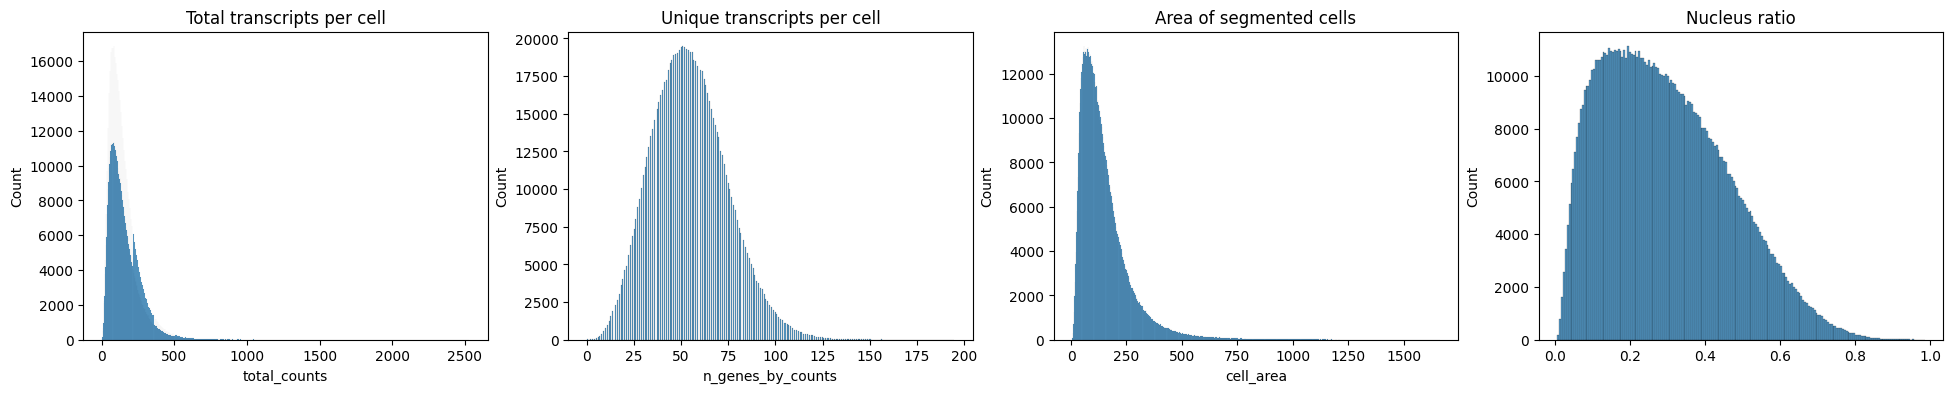

In [19]:
fig, axs = plt.subplots(1, 4, figsize=(24, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)


axs[2].set_title("Area of segmented cells")
sns.histplot(
    adata.obs["cell_area"],
    kde=False,
    ax=axs[2],
)

axs[3].set_title("Nucleus ratio")
sns.histplot(
    adata.obs["nucleus_area"] / adata.obs["cell_area"],
    kde=False,
    ax=axs[3],
)

In [20]:
sc.pp.filter_cells(adata, min_counts=10)
sc.pp.filter_genes(adata, min_cells=5)

In [21]:
adata.write(f'{datadir}/raw/0027465/0027465_region2.h5ad')

## Putting FOVs Together

In [23]:
adata1 = sc.read_h5ad(f'{datadir}/raw/0027465/0027465_region1.h5ad')
adata2 = sc.read_h5ad(f'{datadir}/raw/0027465/0027465_region2.h5ad')

In [25]:
adata1.obs['Region'] = 'Region1'
adata2.obs['Region'] = 'Region2'

In [30]:
adata_combined = ad.concat([adata1, adata2], axis=0)

In [31]:
adata_combined.write(f'{datadir}/raw/0027465/0027465_combined.h5ad')